# CNN 필터 시각화

- 603~637

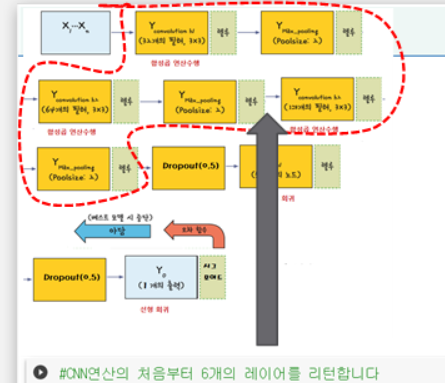

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from keras import models
import matplotlib.pyplot as plt

In [ ]:
model = load_model(model_path)

In [ ]:
# 이미지 로드
img = image.load_img(img_path, target_size=(220,220))

# 3차원으로 변환
img_tensor = image.img_to_array(img)
print(img_tensor.shape)

# 4차원으로 변환
img_tensor = np.expand_dims(img_tensor, axis =0)
print(img_tensor.shape)

# 범위 수정
img_tensor = img_tensor/255

# 예측
model.predict(img_tensor)

(220, 220, 3)
(1, 220, 220, 3)


array([[0.30759504]], dtype=float32)

필터 시각화


In [ ]:
plt.imshow(img_tensor[0])

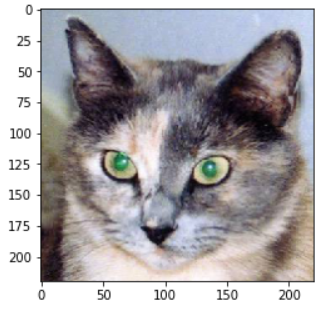

In [ ]:
layer_outputs = [layer.output for layer in model.layers[:6]]
layer_outputs

[<KerasTensor: shape=(None, 220, 220, 32) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 110, 110, 32) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 110, 110, 64) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 55, 55, 64) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 55, 55, 128) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 28, 28, 128) dtype=float32 (created by layer 'max_pooling2d_2')>]

In [ ]:
model.input

<KerasTensor: shape=(None, 220, 220, 3) dtype=float32 (created by layer 'conv2d_input')>

In [ ]:
activation_model = models.Model(
    # 이미지를 필터 연산가능하게 준비
    inputs = model.input,

    # 필터
    outputs = layer_outputs
)
activation_model

In [ ]:
activations = activation_model.predict(img_tensor)

In [ ]:
# 각 단계별 연산 결과 확인
for i in range(len(activations)):
  print("모델 layer 계산 {}층 , {} :".format(i ,layer_outputs))
  print("img_tensor 연산 결과 :")
  print("activations[{}].shape ={} ".format(i, activations[i].shape))
  print("="*100)

모델 layer 계산 0층 , [<KerasTensor: shape=(None, 220, 220, 32) dtype=float32 (created by layer 'conv2d')>, <KerasTensor: shape=(None, 110, 110, 32) dtype=float32 (created by layer 'max_pooling2d')>, <KerasTensor: shape=(None, 110, 110, 64) dtype=float32 (created by layer 'conv2d_1')>, <KerasTensor: shape=(None, 55, 55, 64) dtype=float32 (created by layer 'max_pooling2d_1')>, <KerasTensor: shape=(None, 55, 55, 128) dtype=float32 (created by layer 'conv2d_2')>, <KerasTensor: shape=(None, 28, 28, 128) dtype=float32 (created by layer 'max_pooling2d_2')>] :
img_tensor 연산 결과 :
activations[0].shape =(1, 220, 220, 32) 
모델 layer 계산 1층 , [<KerasTensor: shape=(None, 220, 220, 32) dtype=float32 (created by layer 'conv2d')>, <KerasTensor: shape=(None, 110, 110, 32) dtype=float32 (created by layer 'max_pooling2d')>, <KerasTensor: shape=(None, 110, 110, 64) dtype=float32 (created by layer 'conv2d_1')>, <KerasTensor: shape=(None, 55, 55, 64) dtype=float32 (created by layer 'max_pooling2d_1')>, <KerasTenso

In [ ]:
# 첫번쨰 필터 시각화
layer_out = activations[0]
layer_out.shape

fig = plt.figure(figsize = (15, 20))

# 첫번째 연산 필터 결과
i = 0
for i in range(32):
  subplot = fig.add_subplot(8, 4, i+1)
  subplot = plt.imshow(layer_out[0, :, :, i])

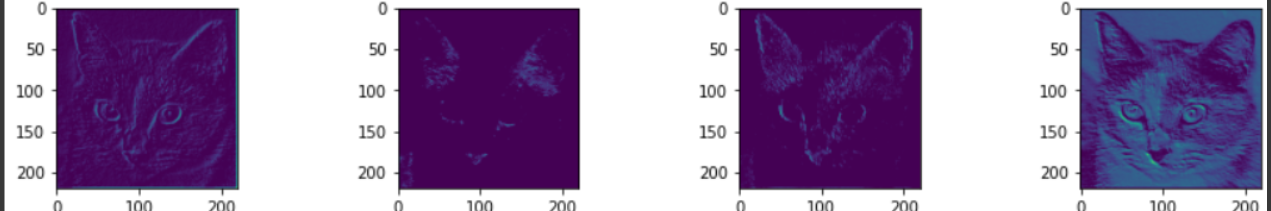

In [ ]:
# 두번쨰 필터 시각화
layer_out = activations[2]
layer_out.shape

fig = plt.figure(figsize = (15, 40))

# 첫번째 연산 필터 결과
i = 0
for i in range(32):
  subplot = fig.add_subplot(16, 4, i+1)
  subplot = plt.imshow(layer_out[0, :, :, i])

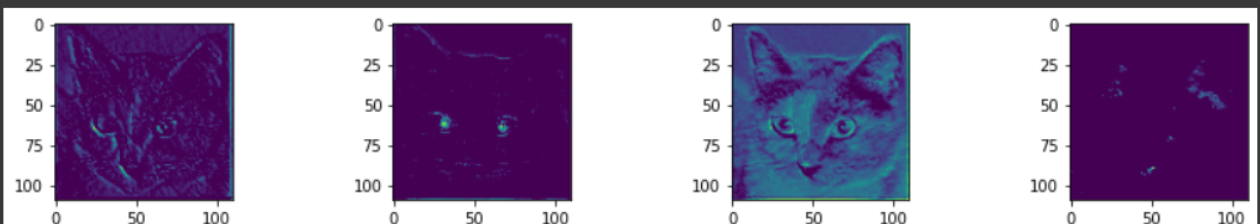